PCA - Unsupervised Dimensionality Reduction  : 

PCA helps us to identify patterns in data based on the correlation between features. In a nutshell, PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.


If we use PCA for dimensionality reduction, we construct a –dimensional transformation matrix W that allows us to map a sample vector x onto a new k–dimensional feature subspace that has fewer dimensions than the original d–dimensional feature space:

As a result of transforming the original d-dimensional data onto this new k-dimensional subspace (typically k << d), the first principal component will have the largest possible variance, and all consequent principal components will have the largest variance given the constraint that these components are uncorrelated (orthogonal) to the other principal components—even if the input features are correlated, the resulting principal components will be mutually orthogonal (uncorrelated). Note that the PCA directions are highly sensitive to data scaling, and we need to standardize the features prior to PCA if the features were measured on different scales and we want to assign equal importance to all features.

# Steps in PCA 

1 - Standardize the d-dimensional dataset. 

2 - Construct the covariance matrix. 

3 - Decompose the covariance matrix into its eigenvectors and eigenvalues.

4 - Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors. 

5 - Select k eigenvectors which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace ().  

6 - Construct a projection matrix W from the "top" k eigenvectors. 

7 - Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.


In [1]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.model_selection import train_test_split

X = df_wine.iloc[:,1:].values

y = df_wine.iloc[:,0].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=0,stratify=y)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)

X_test_std = sc.transform(X_test)

# Constructing the covariance matrix 

In [7]:
import numpy as np 

cov_mat = np.cov(X_train_std.T)

In [19]:
eigen_vals ,eigen_vecs = np.linalg.eig(cov_mat)

In [9]:
print("Eigen Values : ",eigen_vals)

Eigen Values :  [ 4.84274532  2.41602459  1.54845825  0.96120438  0.84166161  0.6620634
  0.51828472  0.34650377  0.3131368   0.10754642  0.21357215  0.15362835
  0.1808613 ]


# Plotting the Variance Explained Ratio 

The variance explained ratio of an eigenvalue  is simply the fraction of an eigenvalue  and the total sum of the eigenvalues:

In [15]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [16]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

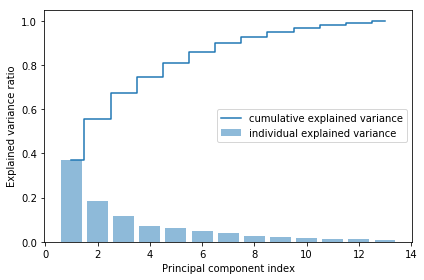

In [17]:
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

In [20]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [21]:
X_train_std[0].dot(w)

array([ 2.38299011,  0.45458499])

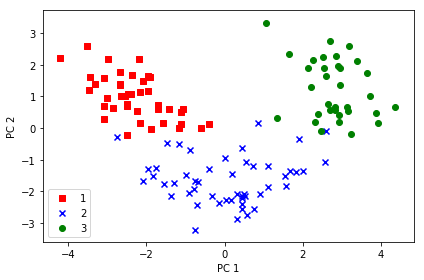

In [22]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()